# 0. Install Dependencies

In [ ]:
!pip install tensorflow
!pip install gym
!pip install keras
!pip install keras-rl2
!pip install pygame
!pip install matplotlib --user

In [59]:

!pip install seaborn --user

     -------------------------------------- 288.2/288.2 kB 1.0 MB/s eta 0:00:00


In [61]:
!pip install pandas --user

In [53]:
!pip  --v pandas


Usage:   
  pip <command> [options]

ambiguous option: --v (--verbose, --version?)


In [ ]:
!conda info --envs

# 1. Test Random Environment with OpenAI Gym

In [73]:
from gym import Env
from gym.spaces import Discrete, Box
import numpy as np
import random
import math
import matplotlib.pyplot as plt
import pygame
from pygame.locals import * 
import random


In [89]:
from logging import exception
class RoomEnv(Env):
    def __init__(self,FD,Door,Window):
        # Actions we can up, down, right, left
        self.action_space = Discrete(4)
        # Room Dimensions
        self.observation_space = Box(low=0, high=100, shape=(1,2),dtype=np.int16)
        # Set start temp
        self.state = [random.randint(25, 75),random.randint(25, 75)]
        self.scale_factor = 4
        self.screen_width=self.scale_factor*self.observation_space.high[0][0]
        self.screen_height=self.scale_factor*self.observation_space.high[0][0]
        self.door_pos = Door[0]
        self.door_dimensions = tuple(self.scale_factor * elem for elem in Door[1])
        self.window_pos = Window[0]
        self.window_dimensions = tuple(self.scale_factor * elem for elem in Window[1])
        self.furniture_dimensions=tuple(self.scale_factor * elem for elem in FD)
        self.dist1=int(math.dist( [50,50], self.state ))
        self.dist2=int(math.dist(self.state, self.door_pos ))
        self.dist3=int(math.dist(self.state, self.window_pos ))

        
        # Set shower length
        self.move_length = 200
        self.screen = None
        self.clock = None
        self.isopen = True
        self.accumulator = 0
        self.past_state=[0,0]
        self.past_dist = 0
        
    def step(self, action):
        # Apply action
         
        if(action==0 and self.state[0]<100 ):
          # go right
          self.state = np.add([1,0],self.state)
        if(action==1 and self.state[0]>0 ):
          # go left
          self.state = np.add([-1,0],self.state)
        if(action==2 and self.state[1]<100):
          # go down
          self.state = np.add([0,1],self.state)
        if(action==3 and self.state[1]>0):
          # go up
          self.state = np.add([0,-1],self.state)
        # Reduce move length by 1 second
        self.move_length -= 1 
        
        self.dist1=int(math.dist( [50,50], self.state ))
        self.dist2=int(math.dist(self.state, self.door_pos ))
        self.dist3=int(math.dist(self.state, self.window_pos ))
        # Calculate reward
        if(self.past_dist<int(self.dist1+self.dist2+self.dist3)):
            reward=int(self.dist1+self.dist2+self.dist3)/10
            
        else:
            reward= -1
            
#         reward = int(math.dist(np.mean( np.array([ [50,50], self.door_pos ]), axis=0 ), self.state))
#         if(self.past_state[0] ==self.state[0] and self.past_state[1] ==self.state[1]):
           
#             reward= -1
       
        
        
        self.past_state =self.state
        
        self.past_dist=int(self.dist1+self.dist2+self.dist3)
        # Check if shower is done
        if self.move_length <= 0: 
            done = True
        else:
            done = False
        
        # Apply temperature noise
        #self.state += random.randint(-1,1)
        # Set placeholder for info
        info = {}
        
        
        
        # Return step information
        return self.state, reward, done, info
    def render(self,mode):
        if self.screen is None:
            pygame.init()
            pygame.display.init()
            pygame.display.set_caption("Layout Optimization")
        self.screen = pygame.display.set_mode((self.screen_width, self.screen_height))
        if self.clock is None:
            self.clock = pygame.time.Clock()



        if self.state is None:
            return None

        x = self.state

        self.screen.fill((143,0,255))
        
        pygame.draw.rect(self.screen,(252, 198, 108),((self.state[0]*self.scale_factor-(self.furniture_dimensions[0]/2)),(self.state[1]*self.scale_factor-(self.furniture_dimensions[1]/2)),self.furniture_dimensions[0],self.furniture_dimensions[1]))  
        pygame.draw.rect(self.screen,(0,0,0),(self.door_pos[0]*self.scale_factor,self.door_pos[1]*self.scale_factor,self.door_dimensions[0],self.door_dimensions[1]))
        pygame.draw.rect(self.screen,(0,0,0),(self.window_pos[0]*self.scale_factor,self.window_pos[1]*self.scale_factor,self.window_dimensions[0],self.window_dimensions[1]))
#         pygame.event.pump()
        self.clock.tick(50)
        pygame.display.flip()
        
        for event in pygame.event.get():
            if event.type == QUIT:
                self.close()


    def close(self):
            pygame.display.quit()
            pygame.quit()
            self.isopen = False

    def render2(self):
        print(self.state)
        grid = np.zeros((101, 101))
        grid = np.transpose(grid)
        
        
        grid[self.state[1]+50-1][self.state[0]+50-1]=1
        plt.figure(figsize = (10,10))
        gridx, gridy = grid.shape
        plt.ylim(0,100)
        # plt.xlim(-50,50)
        
        plt.imshow(grid)
        
    def render3(self):
        import numpy as np
        z=np.zeros((self.observation_space.high[0][0],self.observation_space.high[0][0]), dtype=int)
        for i in range(self.observation_space.high[0][0]):
            for j in range(self.observation_space.high[0][0]):
                z[i][j]=(int(math.dist( [50,50], [i,j] )))+(int(math.dist( self.door_pos, [i,j] )))+(int(math.dist( self.window_pos, [i,j] )))
                
        for i in range(self.window_pos[0],self.window_pos[0]+15):
            for j in range(self.window_pos[1],self.window_pos[1]+2):
                z[i][j]=0
        for i in range(self.door_pos[0],self.door_pos[0]+2):
            for j in range(self.door_pos[1],self.door_pos[1]+10):
                z[i][j]=0
        for i in range(self.state[1]-2,min(self.state[1]+2,99)):
            for j in range(self.state[0]-5,min(self.state[0]+5,99)):
                z[i][j]=0
                
        
        import matplotlib.pyplot as plt
        

        

        plt.imshow(z, cmap='hot', interpolation='nearest')

        plt.title('2-D Heat Map in Room')
        plt.colorbar()
        plt.gca().invert_yaxis()
        plt.show()
    
    def reset(self):
        
        # Reset shower temperature
        # print("reset called")
        # print(self.state)
        self.state = [random.randint(25, 75),random.randint(25, 75)]
        # Reset shower time
        self.move_length = 100
        return  self.state
    

In [90]:
env = RoomEnv((5,15),((0,25),(2,10)),((80,0),(15,2)))

In [54]:
episodes = 10
for episode in range(1, episodes+1):
    state = env.reset()
    done = False
    score = 0 
    switch = False
    
    while not done:
        env.render("human")
        if(switch):
            action = 0
            switch=False
        else:
            action = 2
            switch=True
#         print('CurrentPos:{}'.format(action))
        
        n_state, reward, done, info = env.step(action)
        score+=reward
    print('Episode:{} Score:{} '.format(episode, score))
    env.close()

Episode:1 Score:1563.0 
Episode:2 Score:1402.9999999999998 
Episode:3 Score:1609.1000000000001 
Episode:4 Score:1313.5 
Episode:5 Score:1355.1 
Episode:6 Score:1676.8 
Episode:7 Score:1655.6 
Episode:8 Score:1826.6 
Episode:9 Score:1651.1 
Episode:10 Score:1295.2 


# 2. Create a Deep Learning Model with Keras

In [91]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

In [92]:
states = env.observation_space.shape
actions = env.action_space.n

In [93]:
states

(1, 2)

In [94]:
def build_model(states, actions):
    model = Sequential()
    model.add(Flatten(input_shape=states))   
    model.add(Dense(24, activation='relu', input_shape=states))
    model.add(Dense(24, activation='relu'))
    
    model.add(Dense(actions, activation='linear'))
    return model

In [95]:
del model 

In [96]:
model = build_model(states, actions)

In [97]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 2)                 0         
_________________________________________________________________
dense_15 (Dense)             (None, 24)                72        
_________________________________________________________________
dense_16 (Dense)             (None, 24)                600       
_________________________________________________________________
dense_17 (Dense)             (None, 4)                 100       
Total params: 772
Trainable params: 772
Non-trainable params: 0
_________________________________________________________________


# 3. Build Agent with Keras-RL

In [98]:
from rl.agents import DQNAgent
from rl.policy import  BoltzmannQPolicy
from rl.memory import SequentialMemory

In [99]:
def build_agent(model, actions):
    policy =  BoltzmannQPolicy()
    memory = SequentialMemory(limit=500000, window_length=1)
    dqn = DQNAgent(model=model, memory=memory, policy=policy, 
                  nb_actions=actions, nb_steps_warmup=300, target_model_update= 1e-3)
    return dqn

In [100]:

dqn = build_agent(model, actions)
dqn.compile(Adam(lr=1e-3), metrics=['mae'])
dqn.fit(env, nb_steps=10000, visualize=True, verbose=1)
env.close(); 

Training for 10000 steps ...
Interval 1 (0 steps performed)
 1878/10000 [====>.........................] - ETA: 2:55 - reward: 8.8726done, took 40.655 seconds


In [27]:
dqn.save_weights(model.name+'doorWindowRandomStartSuccess'+'dqn_weights2.h5f', overwrite=True)

In [ ]:

scores = dqn.test(env, nb_episodes=5, visualize=True)
env.close();
print(scores.history['episode_reward'])

Testing for 5 episodes ...


In [165]:
env.state

[35, 69]

In [85]:
dqn = build_agent(model, actions)
dqn.compile(Adam(lr=1e-3), metrics=['mae'])

In [86]:
dqn.load_weights('sequential_1doorWindowRandomStartSuccessdqn_weights2.h5f')

In [87]:
scores = dqn.test(env, nb_episodes=5, visualize=True)
env.close();
print(scores.history['episode_reward'])

Testing for 5 episodes ...
Episode 1: reward: 1502.500, steps: 100
Episode 2: reward: 1364.800, steps: 100
Episode 3: reward: 1411.300, steps: 100
Episode 4: reward: 1566.700, steps: 100
Episode 5: reward: 1671.800, steps: 100
[1502.5000000000002, 1364.8000000000004, 1411.3, 1566.7000000000003, 1671.8000000000002]


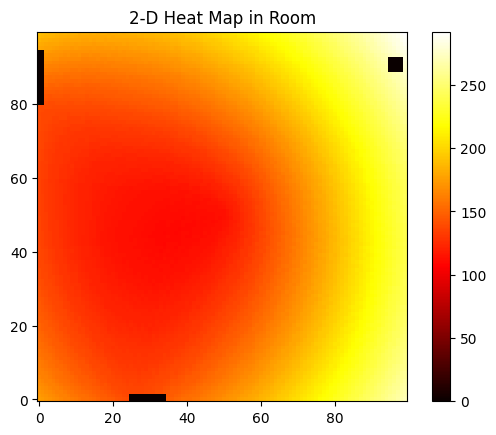

In [88]:
env.render3()

# 4. Reloading Agent from Memory

In [ ]:
del model
del dqn
del env

In [ ]:
env = gym.make('CartPole-v0')
actions = env.action_space.n
states = env.observation_space.shape[0]
model = build_model(states, actions)
dqn = build_agent(model, actions)
dqn.compile(Adam(lr=1e-3), metrics=['mae'])

In [ ]:
_ = dqn.test(env, nb_episodes=5, visualize=True)